# Equillibrium chemistry model with TRIDENT

This tutorial demonstrates how to read in an equillibrium chemistry databse precomputed by Fastchem, and use the database to generate transmission spectrum under equillibrium chemistry with Trident. 

The database should be downloaded and put under the same directory as the environment vairable "POSEIDON_input_data" that we have set up.

### Example: Reading the database

Let's begin by reading the database by using our provided function.

In [3]:
from POSEIDON.eq_interpolate import get_MR
import numpy as np
T = np.full(20, 1000)
P = np.full(20, 0)
C_O = 1
Met = 0
species = ['H2O', 'CH4', 'NH3', 'CO2'] # hydrogen ion
log_X_params_dict = get_MR(P, T, C_O, Met, species, return_dict=True)
log_X_params_array = get_MR(P, T, C_O, Met, species, return_dict=False)
print("Returning dictionary:")
print(log_X_params_dict)
print("_________________________________________________________________________")
print("Returning array:")
print(log_X_params_array)

Returning dictionary:
{'H2O': array([-3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969,
       -3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969,
       -3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969,
       -3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969]), 'CH4': array([-3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187,
       -3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187,
       -3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187,
       -3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187]), 'NH3': array([-5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303,
       -5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303,
       -5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303,
       -5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303]), 'CO2': array([-7.64166641, -7.64166641, -7.64166641, -7.64166641, -7.64166641,
       

Now, let's create a plot showing how mixing ratios of species change as pressure changes.

KeyError: 'Unable to open object (component not found)'

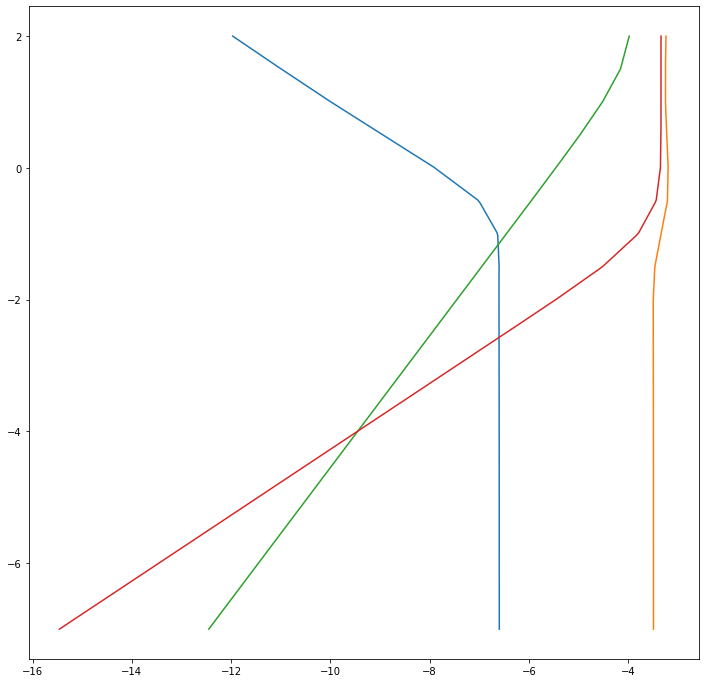

In [4]:
from POSEIDON.eq_interpolate import get_MR

import numpy as np
import matplotlib.pyplot as plt
import os

log_P_range = np.linspace(-7, 2, 200)
T_single = 1000
C_O_single = 0.55
log_Met_single = 0

species = ['CO2', 'H2O', 'NH3', 'CH4', 'H2SO4'] # Raise an exception if not existed
figure = plt.figure()
figure.set_size_inches(12.0, 12.0)
for i in range(0, len(species)):
  plt.plot(get_MR(log_P_range, T_single, C_O_single, log_Met_single, species[i], return_dict=False), log_P_range, label=species[i])

plt.xscale('linear')
plt.yscale('linear')
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])

plt.xlabel("log(X)")
plt.ylabel("log(Pressure (bar))")
plt.legend()

plt.show()

# we could also save the figure as a pdf
# os.mkdir('../output')
figure.savefig('../output/log(X)-log(P)_new.pdf')

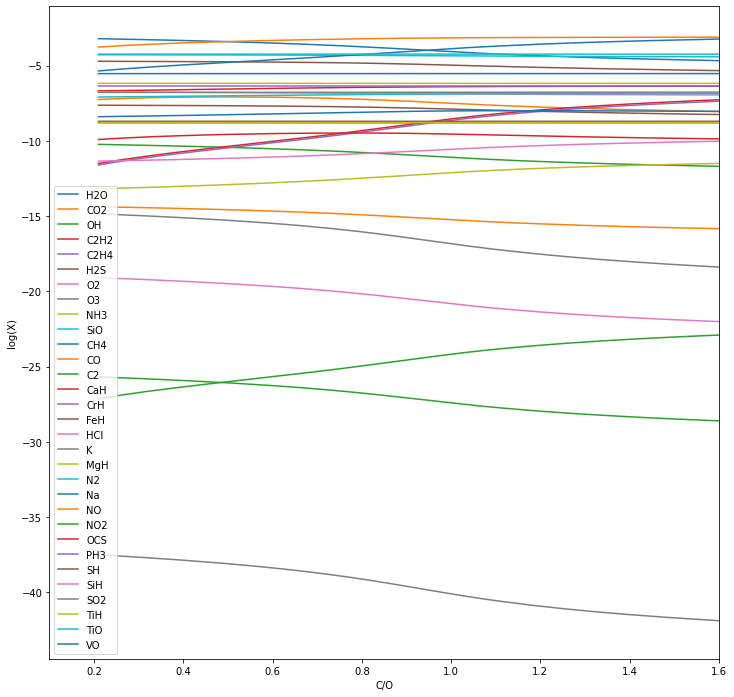

In [5]:
from POSEIDON.eq_interpolate import get_supported_species
species = get_supported_species()
log_P_single = 0.1
T_single = 1400
C_O_range = np.linspace(0.21, 2, 5000)
log_Met_single = 0

figure = plt.figure()
figure.set_size_inches(12.0, 12.0)

plt.gca().invert_yaxis()
plt.xlim([0.1, 1.6])


for i in range(0, len(species)):
  plt.plot(C_O_range, get_MR(log_P_single, T_single, C_O_range, log_Met_single, species[i], return_dict=False), label=species[i])
  
plt.xscale('linear')
plt.yscale('linear')
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])


plt.xlabel("C/O")
plt.ylabel("log(X)")
plt.legend()

plt.show()
figure.savefig('../output/CO-log(X)_new.pdf')

In [8]:
from POSEIDON.eq_interpolate import get_grid_info, print_grid_info
get_grid_info('c/o')
print_grid_info()

Temperature grid:[ 300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400.
 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600.
 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800.
 3900. 4000.]
Pressure grid:[1.0000000e-07 3.1622776e-07 1.0000000e-06 3.1622776e-06 9.9999997e-06
 3.1622778e-05 9.9999997e-05 3.1622776e-04 1.0000000e-03 3.1622776e-03
 9.9999998e-03 3.1622775e-02 1.0000000e-01 3.1622776e-01 1.0000000e+00
 3.1622777e+00 1.0000000e+01 3.1622776e+01 1.0000000e+02]
Metallicity grid:[1.0000000e-01 1.1220185e-01 1.2589253e-01 1.4125375e-01 1.5848932e-01
 1.7782794e-01 1.9952624e-01 2.2387211e-01 2.5118864e-01 2.8183830e-01
 3.1622776e-01 3.5481340e-01 3.9810717e-01 4.4668359e-01 5.0118721e-01
 5.6234133e-01 6.3095737e-01 7.0794576e-01 7.9432821e-01 8.9125091e-01
 1.0000000e+00 1.1220185e+00 1.2589254e+00 1.4125376e+00 1.5848932e+00
 1.7782794e+00 1.9952623e+00 2.2387211e+00 2.5118864e+00 2.8183830e+00
 3.1622777e+00 3.54813

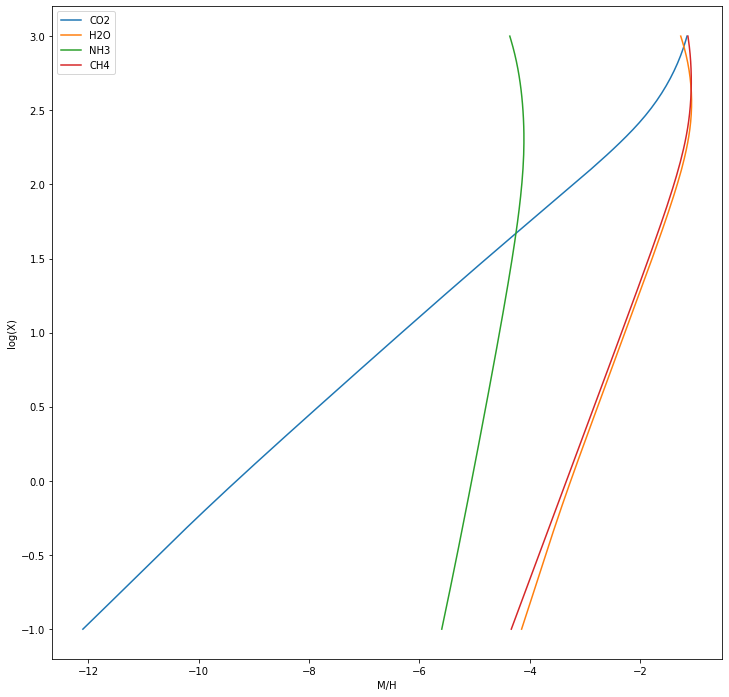

In [ ]:
log_P_single = np.full(5000, 0.1)
T_single = np.full(5000, 900)
C_O_single = np.full(5000, 0.55)
log_Met_range = np.linspace(-1, 3, 5000)

figure = plt.figure()
figure.set_size_inches(12.0, 12.0)

for i in range(0, len(species)):
  fig = plt.plot(get_MR(log_P_single, T_single, C_O_single, log_Met_range, species[i], return_dict=False), log_Met_range, label=species[i])
  
plt.xscale('linear')
plt.yscale('linear')

plt.gca().invert_yaxis()
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])

plt.xlabel("M/H")
plt.ylabel("log(X)")
plt.legend()

plt.show()
figure.savefig('../output/MH-log(X)_new.pdf')

In [10]:
import h5py
database_path = os.environ.get("POSEIDON_input_data")
if database_path == None:
    raise Exception("POSEIDON cannot locate the database for equillibrium chemistry.\n"
                    "Please set the 'POSEIDON_input_data' variable in " +
                    "your .bashrc or .bash_profile to point to the " +
                    "directory containing the POSEIDON opacity database.")

database = h5py.File(database_path+'eq_database.hdf5', 'r')

In [14]:
log_P_range = np.linspace(-7, 2, 100)
T_single = 2000
C_O_single = 1
log_Met_single = 0
%timeit get_MR(log_P_range, T_single, C_O_single, log_Met_single, 'H2O')

120 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
